In [7]:
from numpy import *
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 5]

In [2]:
points = genfromtxt('data.csv', delimiter=',')

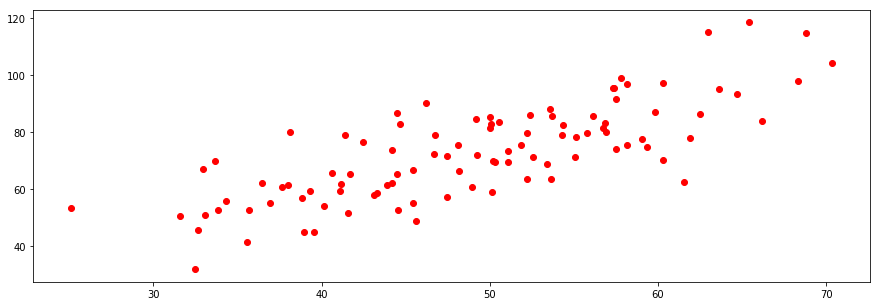

In [8]:
plt.scatter(points[:, 0], points[:, 1], color='red')
plt.show()

In [16]:
def meanSquaredError(b, m):
    error = 0
    
    for i in range(len(points)):
        x = points[i, 0]
        y = points[i, 1]
        error += (y - (m*x + b)) ** 2
    
    return error / float(len(points))

def stepGradient(cb, cm, LR):
    db = 0
    dm = 0
    N = float(len(points))
    
    for i in range(len(points)):
        x = points[i, 0]
        y = points[i, 1]
        
        db = -(2/N) * (y - (cm*x + cb))
        dm = -(2/N) * (y - (cm*x + cb)) * x
        
    nb = cb - LR*db
    nm = cm - LR*dm
    
    return [nb, nm]

def gradientDescent(sb, sm, LR, epochs):
    b = sb
    m = sm
    
    for _ in range(epochs):
        [b, m] = stepGradient(b, m, LR)
        
    return [b, m]

def train():
    b = 0
    m = 0
    LR = 0.0001
    epochs = 1000
    
    [b, m] = gradientDescent(b, m, LR, epochs)
    
    print(b, m)
    return [b, m]

In [17]:
print('Initial accuracy: ', meanSquaredError(0, 0))

import time
t = time.time()
[b, m] = train()
print('Training time: ', time.time()-t, 's')

print('Final accuracy: ', meanSquaredError(b, m))

x = arange(20, 75)
y = eval('m*x + b')

Initial accuracy:  5565.107834483211
0.060681971799628164 1.5248459967635082
Training time:  0.1489098072052002 s
Final accuracy:  118.029122441144


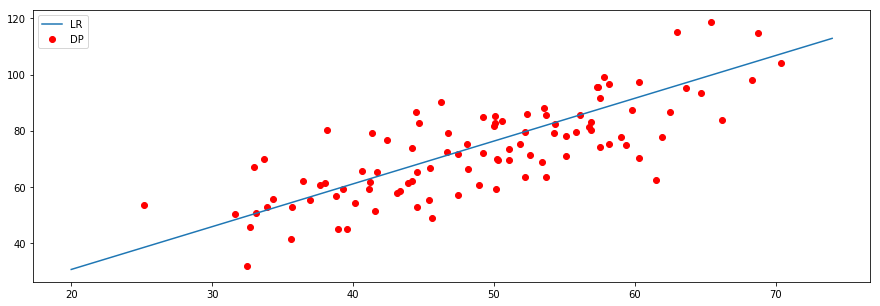

In [21]:
plt.scatter(points[:, 0], points[:, 1], color='red')
plt.plot(x, y)
plt.legend(['LR', 'DP'])
plt.show()